# 1 data preparation

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('max_colwidth',100)

customers=pd.read_csv('../input/olist_customers_dataset.csv')
geolocation=pd.read_csv('../input/olist_geolocation_dataset.csv')
order_items=pd.read_csv('../input/olist_order_items_dataset.csv')
order_payments=pd.read_csv('../input/olist_order_payments_dataset.csv')
order_reviews=pd.read_csv('../input/olist_order_reviews_dataset.csv')
orders=pd.read_csv('../input/olist_orders_dataset.csv')
products=pd.read_csv('../input/olist_products_dataset.csv')
sellers=pd.read_csv('../input/olist_sellers_dataset.csv')
translation=pd.read_csv('../input/product_category_name_translation.csv')

#Concatenating DataFrames
order_merge_list=[order_items,order_payments,order_reviews]

for item in order_merge_list:
    orders=pd.merge(orders,item,on='order_id',how='left')

orders=pd.merge(orders,products,on='product_id',how='left')

#translate to Englis
orders_full=pd.merge(orders,translation,on='product_category_name',how='left')

#Concat seller location data
sellers_geo=pd.merge(sellers,geolocation,left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix')

#Concat customer location data
customers_geo=pd.merge(customers,geolocation,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix')

In [20]:
orders_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [22]:
orders_full.to_csv(r'../input/olist_orders_full.csv')

In [14]:
#set the readable time 
date_cols=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date' ,'order_estimated_delivery_date','shipping_limit_date','review_creation_date','review_answer_timestamp']
for item in date_cols:
    orders_full[item]=pd.to_datetime(orders_full[item])
orders_full.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119151 non-null  object        
 1   customer_id                    119151 non-null  object        
 2   order_status                   119151 non-null  object        
 3   order_purchase_timestamp       119151 non-null  datetime64[ns]
 4   order_approved_at              118974 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117065 non-null  datetime64[ns]
 6   order_delivered_customer_date  115730 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119151 non-null  datetime64[ns]
 8   order_item_id                  118318 non-null  float64       
 9   product_id                     118318 non-null  object        
 10  seller_id                      118318 non-null  object        
 11  

# 2 Orders analysis

which product catogory has the most revenue

#Top category selling amount 

Top 10: bed_bath_table

health_beauty

sport_leisure

furniture_decor

computers_accessories

housewares

watches_gifts

telephony

garden_tools

auto


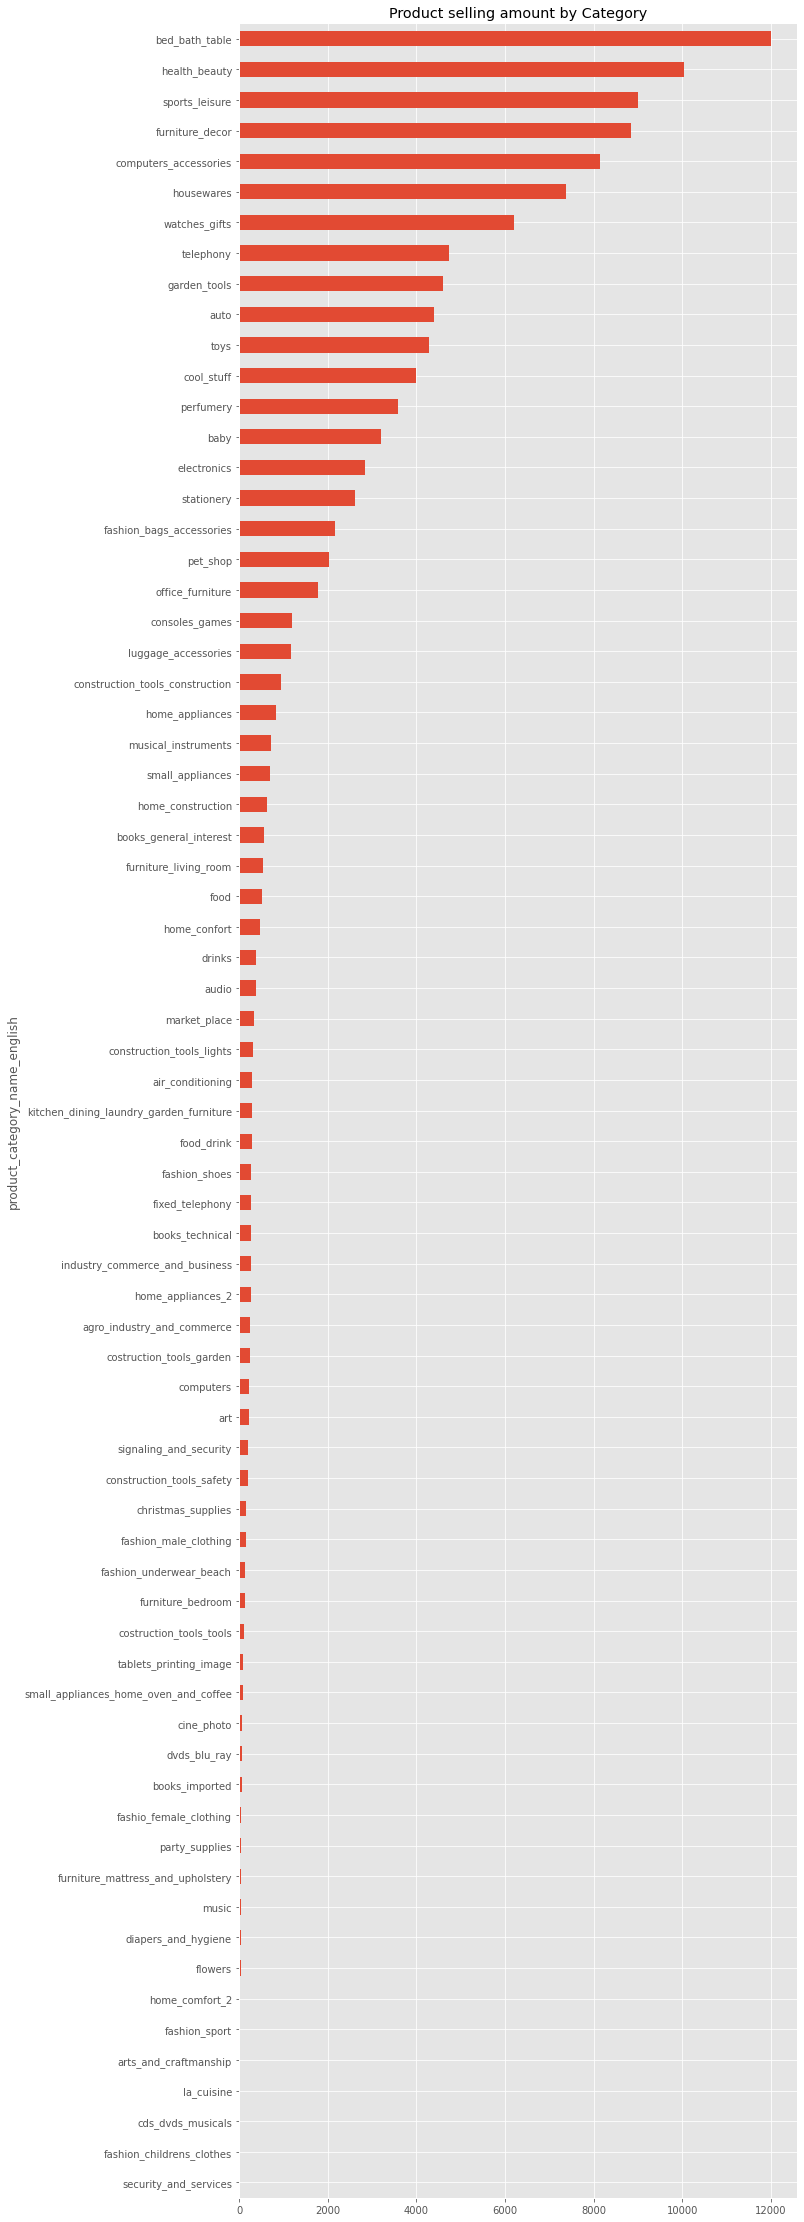

In [48]:
plt.subplots()
product_counts=orders_full.groupby(['product_category_name_english']).size().sort_values()
product_counts.plot(kind='barh',figsize=(10,40),title='Product selling amount by Category')
plt.style.use('ggplot')

# Top category selling revenue 
Top 10: health_beauty

watches_gifts

bed_bath_table

sports_leisure

computers_accessories

furniture_decor

housewares

cool_stuff

auto

garden_tools


In [ ]:
poductPrice_Sum = orders_full.groupby(['product_category_name_english'])['price'].agg('sum').sort_values(ascending=True)
poductPrice_Sum.plot(kind='barh',figsize=(10,40),title=' Product selling revenue by Category')
plt.style.use('ggplot')